In [1]:
import glob

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Aggregate raw data

In [2]:
df = pd.DataFrame()

for csv in glob.glob('raw_dataset/*.csv'):
    df = df.append(pd.read_csv(csv))

## Initial data summaries

In [3]:
df.head()

,LOT_ID,WAFER_ID,WAFER_SCRIBE_ID,INSPECTION_DATE,REAL_WAFER_X,REAL_WAFER_Y
0,H9212940,26,5CXZR026MVB3,2019-08-28 10:39:59,-118944.463,30579.171
1,H9212940,26,5CXZR026MVB3,2019-08-28 10:39:59,-117872.247,30813.035
2,H9212940,26,5CXZR026MVB3,2019-08-28 10:39:59,-117701.912,-33059.266
3,H9212940,26,5CXZR026MVB3,2019-08-28 10:39:59,-107921.980,-32079.192
4,H9212940,26,5CXZR026MVB3,2019-08-28 10:39:59,-107618.931,30148.652


In [4]:
df.describe()

,WAFER_ID,REAL_WAFER_X,REAL_WAFER_Y
count,215973.000000,215973.000000,215973.000000
mean,275.677737,19718.283616,-7420.587612
std,241.414211,63502.697832,73434.749054
min,1.000000,-143368.468000,-144592.654000
25%,49.000000,-21716.357000,-62709.318000
50%,226.000000,19406.334000,-11312.906000
75%,426.000000,78559.296000,58401.107000
max,972.000000,143575.667000,146373.224000


In [5]:
df.dtypes

LOT_ID              object
WAFER_ID             int64
WAFER_SCRIBE_ID     object
INSPECTION_DATE     object
REAL_WAFER_X       float64
REAL_WAFER_Y       float64
dtype: object

## Plotting inspections over time

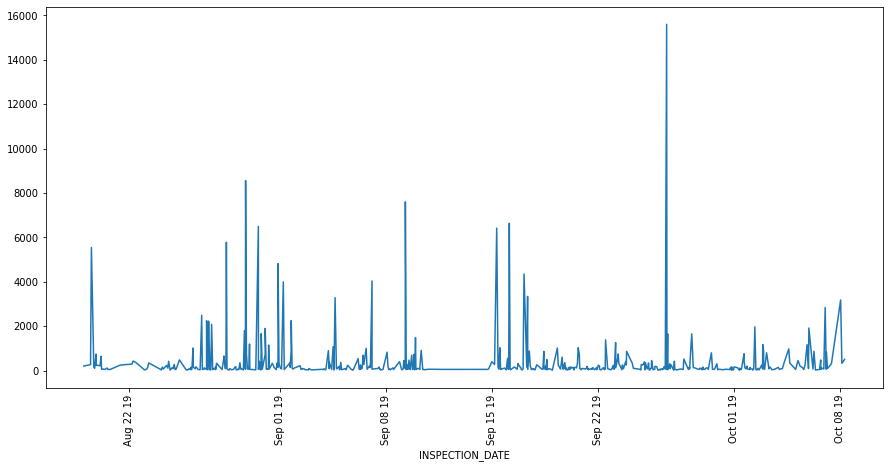

In [6]:
df['INSPECTION_DATE'] = pd.to_datetime(df['INSPECTION_DATE'])
time_df = df.groupby(['INSPECTION_DATE']).size()
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
sns.lineplot(data=time_df, ax=ax)
plt.xticks(rotation=90)
plt.show()

## Data relationship checks

In [7]:
df.groupby(['LOT_ID']).size()

LOT_ID
H9195980     190
H9195990      67
H9201370     102
H9203230     221
H9211250      43
            ... 
L9296530     106
L9304630    3181
L9305100      43
L9305590      47
L9306030      96
Length: 478, dtype: int64

In [8]:
df.groupby(['LOT_ID','WAFER_ID']).size()

LOT_ID    WAFER_ID
H9195980  163          20
          164         170
H9195990  107          32
          108          35
H9201370  214          74
                     ... 
L9305100  7            28
L9305590  62           25
          63           22
L9306030  703          56
          711          40
Length: 1102, dtype: int64

In [9]:
df.groupby(['LOT_ID', 'WAFER_ID', 'WAFER_SCRIBE_ID']).size()

LOT_ID    WAFER_ID  WAFER_SCRIBE_ID
H9195980  163       DC2CM163JMC6        20
          164       DC2CM164JMH0       170
H9195990  107       DC2DB107JKA2        32
          108       DC2DB108JKE4        35
H9201370  214       IFZBJ214MMG0        74
                                      ... 
L9305100  7         M7FMY007WAB0        28
L9305590  62        IFZPD062MMC4        25
          63        IFZPD063MMG6        22
L9306030  703       M7F5A703WAA1        56
          711       M7F5A711WAD4        40
Length: 1102, dtype: int64

In [10]:
# Relationship between LOT_ID & WAFER_ID and WAFER_SCRIBE_ID is 1 to 1
print(sum((df.groupby(['LOT_ID', 'WAFER_ID', 'WAFER_SCRIBE_ID'])
             .size()
             .to_numpy()) != (df.groupby(['LOT_ID','WAFER_ID'])
                                .size()
                                .to_numpy())
         )
     )

uniq_df1 = (df.groupby(['WAFER_SCRIBE_ID', 'LOT_ID', 'WAFER_ID'])
              .size()
              .reset_index())
uniq_df2 = (df.groupby(['LOT_ID','WAFER_ID','WAFER_SCRIBE_ID'])
              .size()
              .reset_index())
sum(pd.merge(uniq_df2, uniq_df1, on=['WAFER_SCRIBE_ID', 'LOT_ID', 'WAFER_ID'], 
             how='left')['0_y'].isna())

0


0

## Display wafer scan (300mm)

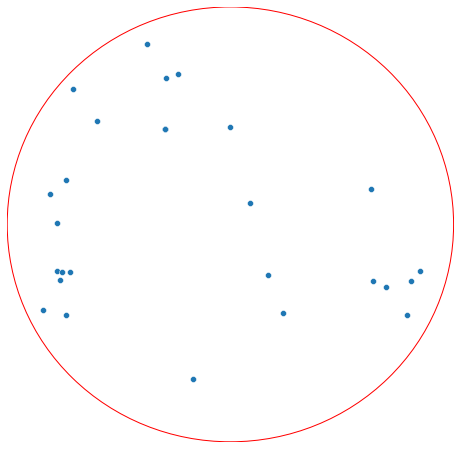

In [11]:
df_xy = df[df['WAFER_SCRIBE_ID'] == 'CZ6VP002JME7']
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df_xy, x='REAL_WAFER_X', y='REAL_WAFER_Y')
plt.xlim([-150000, 150000])
plt.ylim([-150000, 150000])
plt.axis('off')
circle = plt.Circle((0, 0), 150000, color='r', fill=None)
ax.add_patch(circle)
plt.show()